In [280]:
import pickle
import json
import glob
import re
from collections import defaultdict
from pprint import pprint

In [42]:
from pathlib import Path

In [33]:
files = glob.glob("../../data/*")
print(files)

['../../data/pwc-leaderboards.json.xz', '../../data/arxiv-papers.csv.xz', '../../data/segmented-tables.json']


In [34]:
with open(files[2], "r") as f:
    seg_tables = json.load(f)

In [49]:
print(dir(seg_tables[0]))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [51]:
seg_tables[0]

{'arxiv_id': '1202.2745v1',
 'fold': 'img_class',
 'sha256': 'b72ff435bb75f56c58e593d1b13f51c881a3aa80d2c2de91e66afd7bfd3896b9',
 'tables': [{'index': 0,
   'leaderboard': False,
   'ablation': True,
   'dataset_text': 'MNIST',
   'segmentation': [['table-meta',
     'dataset-sub',
     'dataset-sub',
     'dataset-sub',
     'dataset-sub',
     'dataset-sub',
     'dataset-sub',
     ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['dataset-metric', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['model-paper', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '']],
   'records': []},
  {'index': 1,
   'leaderboard': True,
   'ablation': False,
   'dataset_text': 'MNIST',
   'segmentation': [['table

In [45]:
with open("/home/singh_shruti/workspace/PaperAcceptancePrediction/shruti/features/iclr_arxiv_map.pkl", "rb") as f:
    iclr_arxiv_map = pickle.load(f)

In [50]:
iclr_data_arxivids = []

for k, v in iclr_arxiv_map.items():
    if v["found"]:
        iclr_data_arxivids.append(v["arxivId"])
        
iclr_data_arxivids = list(set(iclr_data_arxivids))
print(len(iclr_data_arxivids), iclr_data_arxivids[0:4])

2504 ['1611.02200v1', '1906.04659v3', '1810.02528v1', '1710.09767v1']


In [63]:
to_be_downloaded_set = []

for s in seg_tables:
    if not s["arxiv_id"] in iclr_data_arxivids:
        to_be_downloaded_set.append(s["arxiv_id"])

to_be_downloaded_set = list(set(to_be_downloaded_set))

In [64]:
len(to_be_downloaded_set), to_be_downloaded_set[0:5]

(315,
 ['1607.01759v3',
  '1609.04331v1',
  '1301.3557v1',
  '1606.01847v3',
  '1903.05628v3'])

# First download paper source from arxiv

In [62]:
from urllib.request import urlretrieve
import wget
import time
import glob

In [75]:
base_url = "http://export.arxiv.org/e-print/"
errs = []

for i in range(0, len(to_be_downloaded_set), 4):
    print(i)
    for j in range(0, 4):
        try:
            paper_url = base_url + to_be_downloaded_set[i+j]
            dest_dir = to_be_downloaded_set[i+j].split(".")[0]
            dest_file = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/" + dest_dir + "/"
#             print(to_be_downloaded_set[i+j], dest_file)
#             break
            resp = wget.download(paper_url, dest_file)
        except Exception as ex:
            print(ex, ex.__dict__)
            errs.append(to_be_downloaded_set[i+j])
            if "code" in ex.__dict__ and ex.code == 403:
                print(ex.msg)
                time.sleep(3)
        time.sleep(3)
#     break

0
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1301/_tki7i8p.tmp' {}
4
8
12
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1409/3f9y_dyd.tmp' {}
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1506/ti3dleg0.tmp' {}
16
20
24
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1312/dbl7tya4.tmp' {}
28
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1412/vhqom5aa.tmp' {}
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1412/5hj_1c3e.tmp' {}
32
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1303/3yrc5cze.tmp' {}
[Errno 2] No such file or directory: '/home/singh_shruti/workspace/axcell

312
list index out of range {}


IndexError: list index out of range

In [76]:
ls /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1607/

1607.00036v2  1607.02488v2  1607.04381v2  1607.07086v3
1607.01759v3  1607.04315v3  1607.04423v4  1607 (1).01759v3


In [85]:
len(errs), errs[0:5]

(66,
 ['1301.3557v1', '1409.5185v2', '1506.02640v5', '1312.4400v3', '1412.1632v1'])

In [89]:
new_folders = []
for v in errs:
    new_folders.append(v.split(".")[0])

In [91]:
new_folders = list(set(new_folders))
print(new_folders)

['1509', '1303', '1404', '1411', '1402', '1502', '1504', '1409', '1312', '1207', '1301', '1410', '1302', '1709', '1412', '1505', '1202', '1503', '1406', '1506', '1508', '1405', '1512', '1507']


In [92]:
for i in new_folders:
    dirname = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/" + i
    !mkdir $dirname

mkdir: cannot create directory ‘/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/1709’: File exists


In [93]:
for i in range(0, len(errs), 4):
    print(i)
    for j in range(0, 4):
        try:
            paper_url = base_url + errs[i+j]
            dest_dir = errs[i+j].split(".")[0]
            dest_file = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/sources/" + dest_dir + "/"
            resp = wget.download(paper_url, dest_file)
        except Exception as ex:
            print(ex, ex.__dict__)
            print(errs[i+j])
            if "code" in ex.__dict__ and ex.code == 403:
                print(ex.msg)
                time.sleep(3)
        time.sleep(3)


0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
list index out of range {}


IndexError: list index out of range

# Now extracting tables from pdf

In [79]:
from pathlib import Path
from axcell.helpers.paper_extractor import PaperExtractor
from axcell.data.paper_collection import PaperCollection
from axcell.helpers.datasets import read_tables_annotations

In [81]:
ROOT_PATH = Path('data')
MODELS_PATH = Path('models')

SOURCES_PATH = ROOT_PATH / 'sources'
PAPERS_PATH = ROOT_PATH / 'papers'

In [82]:
segmented_tables = read_tables_annotations(SEGMENTED_TABLES_URL)
pc = PaperCollection.from_files(PAPERS_PATH)
# pc = PaperCollection.from_files(PAPERS_PATH, annotations=segmented_tables.to_dict('record'))

In [96]:
extract = PaperExtractor(ROOT_PATH)

In [120]:
final_res = {}
count_idx = 0

for ppp in to_be_downloaded_set:
    try:
        if count_idx%5 == 0:
            print(count_idx)
            with open("rnadomablationexp.pkl", "wb") as f:
                pickle.dump(final_res, f)
        dir_name = ppp.split(".")[0]
        extract(SOURCES_PATH / dir_name / ppp)
        paper = pc.get_by_id(ppp, ignore_version=False)
        
        final_res[ppp] = {}
        final_res[ppp]["paper"] = paper
        final_res[ppp]["tables"] = paper.tables
        count_idx += 1
    except Exception as ex:
        print(ppp)
        print(ex)

0
1903.05628v3
'NoneType' object has no attribute 'tables'
1610.05256v2
'NoneType' object has no attribute 'tables'
1611.06639v1
'NoneType' object has no attribute 'tables'
1612.03144v2
'NoneType' object has no attribute 'tables'
1809.01812v1
'NoneType' object has no attribute 'tables'
1707.04412v1
'NoneType' object has no attribute 'tables'
1712.00726v1
'NoneType' object has no attribute 'tables'
1711.10485v1
'NoneType' object has no attribute 'tables'
1602.07019v2
'NoneType' object has no attribute 'tables'
1409.5185v2
'NoneType' object has no attribute 'tables'
1901.07291v1
'NoneType' object has no attribute 'tables'
1506.02640v5
'NoneType' object has no attribute 'tables'
1803.10109v1
'NoneType' object has no attribute 'tables'
1712.03609v4
'NoneType' object has no attribute 'tables'
1801.00102v2
'NoneType' object has no attribute 'tables'
1901.00603v1
'NoneType' object has no attribute 'tables'
1810.04826v4
'NoneType' object has no attribute 'tables'
1805.08318v1
'NoneType' object

1404.4326v1
'NoneType' object has no attribute 'tables'
5
1708.01241v2
'NoneType' object has no attribute 'tables'
5
1606.00915v2
'NoneType' object has no attribute 'tables'
5
1412.5567v2
'NoneType' object has no attribute 'tables'
5
1609.06038v3
'NoneType' object has no attribute 'tables'
5
1808.00897v1
'NoneType' object has no attribute 'tables'
5
1601.06733v7
'NoneType' object has no attribute 'tables'
5
1808.05759v5
'NoneType' object has no attribute 'tables'
5
1708.01101v1
'NoneType' object has no attribute 'tables'
5
1609.08144v2
'NoneType' object has no attribute 'tables'
5
1811.05181v1
'NoneType' object has no attribute 'tables'
5
1710.02322v1
'NoneType' object has no attribute 'tables'
5
1507.06228v2
'NoneType' object has no attribute 'tables'
5
1809.02794v1
'NoneType' object has no attribute 'tables'
5
1606.03498v1
'NoneType' object has no attribute 'tables'
5
1512.02595v1
'NoneType' object has no attribute 'tables'
5
1804.05922v1
'NoneType' object has no attribute 'tables'
5

1901.11504v1
'NoneType' object has no attribute 'tables'
5
1707.08254v3
'NoneType' object has no attribute 'tables'
5
1606.02270v2
'NoneType' object has no attribute 'tables'
5
1302.4389v4
'NoneType' object has no attribute 'tables'
5
1708.01353v1
'NoneType' object has no attribute 'tables'
5
1607.00036v2
'NoneType' object has no attribute 'tables'
5
1803.08494v3
'NoneType' object has no attribute 'tables'
5
1808.07042v2
'NoneType' object has no attribute 'tables'
5
1512.08849v2
'NoneType' object has no attribute 'tables'
5
1703.06211v3
'NoneType' object has no attribute 'tables'
5
1703.10717v4
'NoneType' object has no attribute 'tables'
5
1611.06612v3
'NoneType' object has no attribute 'tables'
5
1410.0736v4
'NoneType' object has no attribute 'tables'
5
1412.6071v4
'NoneType' object has no attribute 'tables'
5
1508.05326v1
'NoneType' object has no attribute 'tables'
5
1511.07053v3
'NoneType' object has no attribute 'tables'
5
1903.06048v2
'NoneType' object has no attribute 'tables'
5


In [121]:
with open("rnadomablationexp.pkl", "wb") as f:
    pickle.dump(final_res, f)

In [122]:
final_res

{'1607.01759v3': {'paper': <axcell.data.paper_collection.Paper at 0x7fdb7ba6b908>,
  'tables': [<axcell.data.table.Table at 0x7fdb7949ec88>,
   <axcell.data.table.Table at 0x7fdb7909fcc0>]},
 '1609.04331v1': {'paper': <axcell.data.paper_collection.Paper at 0x7fdb7b6d6d68>,
  'tables': [<axcell.data.table.Table at 0x7fdb79012fd0>,
   <axcell.data.table.Table at 0x7fdb6520e048>]},
 '1301.3557v1': {'paper': <axcell.data.paper_collection.Paper at 0x7fdb7b6d5358>,
  'tables': [<axcell.data.table.Table at 0x7fdb78947320>,
   <axcell.data.table.Table at 0x7fdb652dd748>]},
 '1606.01847v3': {'paper': <axcell.data.paper_collection.Paper at 0x7fdb7b6d5ef0>,
  'tables': [<axcell.data.table.Table at 0x7fdb790310f0>,
   <axcell.data.table.Table at 0x7fdbe3f68828>]},
 '1903.05628v3': {'paper': None},
 '1610.05256v2': {'paper': None},
 '1611.06639v1': {'paper': None},
 '1612.03144v2': {'paper': None},
 '1809.01812v1': {'paper': None},
 '1707.04412v1': {'paper': None},
 '1712.00726v1': {'paper': None},

In [136]:
pc = PaperCollection.from_files(PAPERS_PATH, annotations=segmented_tables.to_dict('record'))

In [139]:
for k in final_res:
    if not final_res[k]['paper']:
        paper = pc.get_by_id(k, ignore_version=False)
        
        final_res[k]["paper"] = paper
        final_res[k]["tables"] = paper.tables

In [166]:
len(final_res)

315

In [172]:
# Found the extra 315, and the rest in 352 are already in ICLR

In [175]:
for s in seg_tables:
     if s["arxiv_id"] in iclr_data_arxivids:
            try:
                ppp = s["arxiv_id"]
                paper = pc.get_by_id(ppp, ignore_version=False)

                final_res[ppp] = {}
                final_res[ppp]["paper"] = paper
                final_res[ppp]["tables"] = paper.tables
            except Exception as ex:
                # These are not yet extracted
                print(ppp)

1807.00734v3
1807.03819v3
1809.11096v2
1811.01483v3
1901.00686v1
1901.10430v2


In [179]:
len(final_res)

352

In [107]:
ls /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1607/1607.01759v3/

layout_01.csv  layout_04.csv  table_01.csv  table_04.csv
layout_02.csv  layout_05.csv  table_02.csv  table_05.csv
layout_03.csv  metadata.json  table_03.csv  text.json


In [108]:
cat /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1607/1607.01759v3/table_01.csv

Model,AG,Sogou,DBP,Yelp P.,Yelp F.,Yah. A.,Amz. F.,Amz. P.
BoW [<ref id='bib-bibx23'>Zhang et al.2015</ref>],88.8,92.9,96.6,92.2,58.0,68.9,54.6,90.4
ngrams [<ref id='bib-bibx23'>Zhang et al.2015</ref>],92.0,97.1,98.6,95.6,56.3,68.5,54.3,92.0
ngrams TFIDF [<ref id='bib-bibx23'>Zhang et al.2015</ref>],92.4,97.2,98.7,95.4,54.8,68.5,52.4,91.5
char-CNN [<ref id='bib-bibx22'>Zhang and LeCun2015</ref>],87.2,95.1,98.3,94.7,62.0,71.2,59.5,94.5
char-CRNN [<ref id='bib-bibx21'>Xiao and Cho2016</ref>],91.4,95.2,98.6,94.5,61.8,71.7,59.2,94.1
VDCNN [<ref id='bib-bibx3'>Conneau et al.2016</ref>],91.3,96.8,98.7,95.7,64.7,73.4,63.0,95.7
"fastText, <italic>h</italic>=10",91.5,93.9,98.1,93.8,60.4,72.0,55.8,91.2
"fastText, <italic>h</italic>=10, bigram",92.5,96.8,98.6,95.7,63.9,72.3,60.2,94.6


In [123]:
ls /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1406/1406.4729v4

layout_01.csv  layout_07.csv  layout_13.csv  table_04.csv  table_10.csv
layout_02.csv  layout_08.csv  layout_14.csv  table_05.csv  table_11.csv
layout_03.csv  layout_09.csv  metadata.json  table_06.csv  table_12.csv
layout_04.csv  layout_10.csv  table_01.csv   table_07.csv  table_13.csv
layout_05.csv  layout_11.csv  table_02.csv   table_08.csv  table_14.csv
layout_06.csv  layout_12.csv  table_03.csv   table_09.csv  text.json


In [135]:
p = pc.get_by_id("1406.4729v4")
print(p)

In [133]:
len(pc)
# pc[0].paper_id

'1611.07078v2'

# Now reading annotated dataset

In [38]:
from axcell.helpers.datasets import read_tables_annotations


V1_URL = 'https://github.com/paperswithcode/axcell/releases/download/v1.0/'
SEGMENTED_TABLES_URL = V1_URL + 'segmented-tables.json.xz'

segmented_tables_annotations = read_tables_annotations(SEGMENTED_TABLES_URL)

leaderboards = (segmented_tables_annotations.tables.apply(
    lambda tables: len([t for t in tables if t['leaderboard']])
).sum())
ablations = (segmented_tables_annotations.tables.apply(
    lambda tables: len([t for t in tables if t['ablation']])
).sum())
records = (segmented_tables_annotations.tables.apply(
    lambda tables: sum([len(t['records']) for t in tables])
).sum())

print(f'Number of papers: {len(segmented_tables_annotations):8}')
print(f'Number of tables: {segmented_tables_annotations.tables.apply(len).sum():8}')
print(f'├── leaderboards: {leaderboards:8}')
print(f'└── ablations:    {ablations:8}')
print(f'Linked results:   {records:8}')

Number of papers:      352
Number of tables:     1994
├── leaderboards:      796
└── ablations:         468
Linked results:       1591


In [162]:
# segmented_tables_annotations.iloc[0]
seg_df = segmented_tables_annotations.set_index('arxiv_id')

In [163]:
seg_data_dict = seg_df.to_dict(orient='index')

In [165]:
len(seg_data_dict.keys()), seg_data_dict.keys()

(352,
 dict_keys(['1202.2745v1', '1207.4708v2', '1301.3557v1', '1302.4389v4', '1303.5778v1', '1312.4400v3', '1312.6082v4', '1312.6229v4', '1402.5766v1', '1404.3606v2', '1404.4326v1', '1405.4053v2', '1406.1078v3', '1406.3676v3', '1406.4729v4', '1406.7806v2', '1409.0473v7', '1409.2329v5', '1409.4842v1', '1409.5185v2', '1409.6070v1', '1410.0736v4', '1410.8206v4', '1410.8516v6', '1411.4038v2', '1412.1632v1', '1412.5567v2', '1412.6071v4', '1412.6597v4', '1412.6830v3', '1412.7062v4', '1412.7149v4', '1502.00702v2', '1502.03167v3', '1502.04623v2', '1502.05700v2', '1503.01640v2', '1503.03244v1', '1503.04596v3', '1504.01013v4', '1504.01106v5', '1504.01482v1', '1504.08083v2', '1505.00393v3', '1505.00853v2', '1505.03229v1', '1505.05899v1', '1506.01497v3', '1506.02075v1', '1506.02351v8', '1506.02640v5', '1506.03340v3', '1506.04579v2', '1506.07503v1', '1507.06228v2', '1508.00330v2', '1508.05326v1', '1509.01626v3', '1509.06664v4', '1509.08967v2', '1509.08985v2', '1511.00561v3', '1511.02583v1', '1511.

# Collate data

In [187]:
c = 0
for k in final_res:
    if "tables" in final_res[k] and final_res[k]["tables"]:
        if len(final_res[k]["tables"]) != len(seg_data_dict[k]["tables"]):
            print(k)
            c+=1
print(c)

0


In [291]:
len(final_resl_res)

352

In [197]:
# check if any annotation is multi label, i.e. both leaderboard and ablation
ambiguous = 0
total = 0
for k in seg_data_dict:
    total += len(seg_data_dict[k]["tables"])
    for i, t in enumerate(seg_data_dict[k]["tables"]):
        if t["leaderboard"] and t["ablation"]:
            print(k, i)
            ambiguous += 1
print("Ambiguous: {} out of total: {}".format(ambiguous, total))

1406.3676v3 2
1412.6071v4 0
1412.6597v4 0
1504.01106v5 3
1506.02075v1 3
1511.06038v4 4
1606.00915v2 8
1704.00051v2 5
1706.00286v3 0
1706.02596v3 2
1707.04412v1 2
1710.10504v2 1
1710.10723v2 3
1711.07341v2 6
1804.05922v1 3
1806.05516v1 1
1806.05516v1 2
Ambiguous: 17 out of total: 1994


In [195]:
seg_data_dict["1406.3676v3"]["tables"][2]

{'index': 2,
 'leaderboard': True,
 'ablation': True,
 'dataset_text': '',
 'segmentation': [['table-meta',
   'dataset-metric',
   'dataset-metric',
   'dataset-metric'],
  ['', 'dataset-metric', 'dataset-metric', 'dataset-metric'],
  ['table-meta', '', '', ''],
  ['model-competing', '', '', ''],
  ['model-competing', '', '', ''],
  ['model-competing', '', '', ''],
  ['model-competing', '', '', ''],
  ['table-meta', '', '', ''],
  ['model-best', '', '', ''],
  ['model-paper', '', '', ''],
  ['table-meta', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', ''],
  ['model-paper', '', '', '']],
 'records': []}

In [299]:
references = defaultdict(dict)
for k in final_res:
    if "tables" in final_res[k] and final_res[k]["tables"]:
        references[k]["ldb"] = []
        references[k]["abl"] = []
        for idx,e in enumerate(seg_data_dict[k]["tables"]):
            actual_ind = idx + 1
            if e["ablation"] and not e["leaderboard"]:
                #print(seg_data_dict[k]["tables"][idx], end="\n\n")
                #print(final_res[k]["tables"][idx].__dict__)
                candidate_name = "table_" + "{:02d}".format(actual_ind) + ".csv"
                table_dir_path = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/" + k.split(".")[0] + "/" + k
                cannot_use_f = open(table_dir_path + "/" + candidate_name, "r")
                for line in cannot_use_f:
                    m = re.findall("<ref id=[0-9a-zA-Z'-]*>[a-zA-Z 0-9\.]*</ref>", line)
                    for iim in m:
                        references[k]["abl"].append(iim)
                references[k]["abl"] = list(set(references[k]["abl"]))
            elif not e["ablation"] and e["leaderboard"]:
                #print(seg_data_dict[k]["tables"][idx], end="\n\n")
                #print(final_res[k]["tables"][idx].__dict__)
                candidate_name = "table_" + "{:02d}".format(actual_ind) + ".csv"
                table_dir_path = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/" + k.split(".")[0] + "/" + k
                cannot_use_f = open(table_dir_path + "/" + candidate_name, "r")
                for line in cannot_use_f:
                    m = re.findall("<ref id=[0-9a-zA-Z'-]*>[a-zA-Z 0-9\.]*</ref>", line)
                    for iim in m:
                        references[k]["ldb"].append(iim)
                references[k]["ldb"] = list(set(references[k]["ldb"]))

In [300]:
len(references)

346

# Stat

In [302]:
ldb_total = 0
abl_total = 0

abl_tables = []
ldb_tables = []

no_refs = []

for k in references:
    ldb_total += len(references[k]["ldb"])
    abl_total += len(references[k]["abl"])
    if len(references[k]["abl"]) > 0:
        abl_tables.append(k)
    if len(references[k]["ldb"]) > 0:
        ldb_tables.append(k)
    
    if len(references[k]["abl"]) == 0 and len(references[k]["abl"]) == 0:
        no_refs.append(k)

print(ldb_total, abl_total, len(ldb_tables), len(abl_tables), len(no_refs))

1758 68 215 24 322


In [298]:
len(references)

346

In [304]:
no_refs[0:10]

['1607.01759v3',
 '1609.04331v1',
 '1301.3557v1',
 '1606.01847v3',
 '1903.05628v3',
 '1610.05256v2',
 '1611.06639v1',
 '1612.03144v2',
 '1809.01812v1',
 '1707.04412v1']

In [306]:
for s in seg_data_dict["1809.01812v1"]["tables"]:
    print(s)
    # THe able containing refs doesnot contain bib ref

{'index': 0, 'leaderboard': True, 'ablation': False, 'dataset_text': 'Penn Treebank', 'segmentation': [['', 'model-params', 'model-params', 'model-params', 'model-params', 'model-params', 'model-params'], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', '']], 'records': []}
{'index': 1, 'leaderboard': False, 'ablation': True, 'dataset_text': '', 'segmentation': [['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', ''], ['', '', '', '', '', '', '']], 'records': []}


In [258]:
abl_tables

['1710.09537v1',
 '1804.07755v2',
 '1703.06870v3',
 '1903.11816v1',
 '1811.04210v2',
 '1604.08242v2',
 '1503.01640v2',
 '1811.12596v1',
 '1605.06885v1',
 '1404.3606v2',
 '1808.00897v1',
 '1811.11374v1',
 '1809.00916v3',
 '1604.03540v1',
 '1202.2745v1',
 '1512.03385v1',
 '1504.01013v4',
 '1801.01641v1',
 '1810.06683v2',
 '1802.02611v3',
 '1606.01549v3',
 '1611.01604v4',
 '1711.07341v2',
 '1804.09541v1']

In [283]:
for idx,i in enumerate(final_res["1606.01549v3"]["tables"]):
    if i.gold_tags == "ablation":
        print(idx)
        print(i.gold_tags)
        print(seg_data_dict["1606.01549v3"]["tables"][idx], end="\n\n")

1
ablation
{'index': 1, 'leaderboard': False, 'ablation': True, 'dataset_text': 'WDW', 'segmentation': [['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', '']], 'records': []}

3
ablation
{'index': 3, 'leaderboard': False, 'ablation': True, 'dataset_text': '', 'segmentation': [['table-meta', 'dataset-metric', 'dataset-metric'], ['table-meta', 'dataset-sub', 'dataset-sub'], ['model-paper', '', ''], ['model-paper', '', ''], ['model-paper', '', ''], ['model-paper', '', ''], ['model-paper', '', '']], 'records': []}



In [285]:
!cat /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1606/1606.01549v3/table_04.csv

<bold>Model</bold>,<bold>Accuracy</bold>,<bold>Accuracy</bold>
<bold>Model</bold>,Val,Test
GA,<bold>68.3</bold>,<bold>68.0</bold>
−char,66.9,66.9
−token-attentions (eq. <ref id='S3-E5'>5</ref>),65.7,65.0
"−glove, +corpus",64.0,62.5
GA–†,–,57


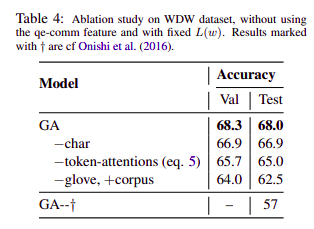

In [286]:
for idx,i in enumerate(final_res["1404.3606v2"]["tables"]):
    if i.gold_tags == "ablation":
        print(idx)
        print(i.gold_tags)
        print(seg_data_dict["1404.3606v2"]["tables"][idx], end="\n\n")

0
ablation
{'index': 0, 'leaderboard': False, 'ablation': True, 'dataset_text': 'MultiPIE cross-illumination', 'segmentation': [['table-meta', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub'], ['model-paper', '', '', '', '', '', ''], ['model-best', '', '', '', '', '', '']], 'records': []}

6
ablation
{'index': 6, 'leaderboard': False, 'ablation': True, 'dataset_text': '', 'segmentation': [['model-params', '', '', '', '', '', '', ''], ['model-paper', '', '', '', '', '', '', ''], ['model-paper', '', '', '', '', '', '', ''], ['model-paper', '', '', '', '', '', '', '']], 'records': []}

9
ablation
{'index': 9, 'leaderboard': False, 'ablation': True, 'dataset_text': 'MNIST', 'segmentation': [['table-meta', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub', 'dataset-sub'], ['model-competing', '', '', '', '', '', '', '', ''], ['model-competing', '', '', '', '', '', '', '', ''], ['model-competing', '

In [289]:
!cat /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1404/1404.3606v2/table_10.csv

Methods,<italic>basic</italic>,<italic>rot</italic>,<italic>bg-rand</italic>,<italic>bg-img</italic>,<italic>bg-img-rot</italic>,<italic>rect</italic>,<italic>rect-img</italic>,<italic>convex</italic>
CAE-2 [<ref id='bib-bib45'>45</ref>],2.48,9.66,10.90,15.50,45.23,1.21,21.54,-
TIRBM [<ref id='bib-bib46'>46</ref>],-,<bold>4.20</bold>,-,-,35.50,-,-,-
PGBM + DN-1 [<ref id='bib-bib40'>40</ref>],-,-,<bold>6.08</bold>,12.25,36.76,-,-,-
ScatNet-2 [<ref id='bib-bib6'>6</ref>],1.27,7.48,12.30,18.40,50.48,<bold>0.01</bold>,<bold>8.02</bold>,6.50
RandNet-1,1.86,14.25,18.81,15.97,51.82,0.21,15.94,6.78
RandNet-2,1.25,8.47,13.47,11.65,43.69,0.09,17.00,5.45
PCANet-1,1.44,10.55,6.77,11.11,42.03,0.15,25.55,5.93
PCANet-2,1.06,7.37,6.19,<bold>10.95</bold>,<bold>35.48</bold>,0.24,14.08,<bold>4.36</bold>
LDANet-1,1.61,11.40,7.16,13.03,43.86,0.15,23.63,6.89
LDANet-2,<bold>1.05</bold>,7.52,6.81,12.42,38.54,0.14,16.20,7.22
PCANet-1 (<italic>k</italic>1=13),1.21,8.30,6.88,11.97,39.06,0.03,13.94,6.75


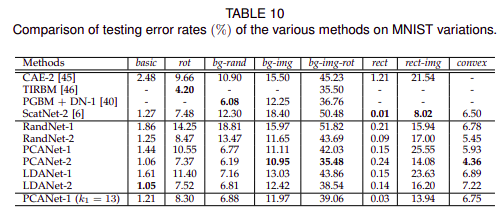

In [292]:
print(len(final_res))

352


In [294]:
total_tables = 0
ablcount = 0
ldbcount = 0

for k in final_res:
    total_tables += len(seg_data_dict[k]["tables"])
    if "tables" in final_res[k] and final_res[k]["tables"]:
        for idx,e in enumerate(seg_data_dict[k]["tables"]):
            actual_ind = idx + 1
            if e["ablation"]:
                ablcount +=1
            if e["leaderboard"]:
                ldbcount +=1

print(total_tables, ablcount, ldbcount)

1994 464 785


In [296]:
1994 - (785+464)

745

In [207]:
final_res[k]["tables"][idx].df.iloc[1,1]

Cell(value='1', raw_value='1', gold_tags='', refs=[], layout='border-tt align-center')

In [221]:
final_res["1406.3676v3"]["tables"][2].name

'table_03.csv'

In [229]:
for t in final_res["1607.01759v3"]["tables"]:
    print(t.__dict__)

{'name': 'table_01.csv', 'caption': 'Table 1: Test accuracy [%] on sentiment datasets. FastText has been run with the same parameters for all the datasets. It has 10 hidden units and we evaluate it with and without bigrams. For char-CNN, we show the best reported numbers without data augmentation.', 'figure_id': 'S2.T1', 'df':                                                    0  \
0  Cell(value='Model', raw_value='Model', gold_ta...   
1  Cell(value='BoW [[Zhang et al.2015]]', raw_val...   
2  Cell(value='ngrams [[Zhang et al.2015]]', raw_...   
3  Cell(value='ngrams TFIDF [[Zhang et al.2015]]'...   
4  Cell(value='char-CNN [[Zhang and LeCun2015]]',...   
5  Cell(value='char-CRNN [[Xiao and Cho2016]]', r...   
6  Cell(value='VDCNN [[Conneau et al.2016]]', raw...   
7  Cell(value='fastText, h=10', raw_value='fastTe...   
8  Cell(value='fastText, h=10, bigram', raw_value...   

                                                   1  \
0  Cell(value='AG', raw_value='AG', gold_tags='',...  

In [231]:
seg_data_dict["1607.01759v3"]['tables'][0]

{'index': 0,
 'leaderboard': True,
 'ablation': False,
 'dataset_text': '',
 'segmentation': [['table-meta',
   'dataset',
   'dataset',
   'dataset',
   'dataset',
   'dataset',
   'dataset',
   'dataset',
   'dataset'],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-competing', '', '', '', '', '', '', '', ''],
  ['model-best', '', '', '', '', '', '', '', ''],
  ['model-best', '', '', '', '', '', '', '', '']],
 'records': []}

In [232]:
candidate_name = "table_" + "{:02d}".format(1) + ".csv"
table_dir_path = "/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/" + "1607" + "/" + "1607.01759v3"
cannot_use_f = open(table_dir_path + "/" + candidate_name, "r")
for line in cannot_use_f:
    m = re.findall("<ref id=[0-9a-zA-Z'-]*>[a-zA-Z 0-9\.]*</ref>", line)
    for iim in m:
        print(iim)

In [233]:
print(table_dir_path + "/" + candidate_name)

/home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1607/1607.01759v3/table_01.csv


In [234]:
!cat /home/singh_shruti/workspace/axcell_ws/axcell/notebooks/data/papers/1607/1607.01759v3/table_01.csv

Model,AG,Sogou,DBP,Yelp P.,Yelp F.,Yah. A.,Amz. F.,Amz. P.
BoW [<ref id='bib-bibx23'>Zhang et al.2015</ref>],88.8,92.9,96.6,92.2,58.0,68.9,54.6,90.4
ngrams [<ref id='bib-bibx23'>Zhang et al.2015</ref>],92.0,97.1,98.6,95.6,56.3,68.5,54.3,92.0
ngrams TFIDF [<ref id='bib-bibx23'>Zhang et al.2015</ref>],92.4,97.2,98.7,95.4,54.8,68.5,52.4,91.5
char-CNN [<ref id='bib-bibx22'>Zhang and LeCun2015</ref>],87.2,95.1,98.3,94.7,62.0,71.2,59.5,94.5
char-CRNN [<ref id='bib-bibx21'>Xiao and Cho2016</ref>],91.4,95.2,98.6,94.5,61.8,71.7,59.2,94.1
VDCNN [<ref id='bib-bibx3'>Conneau et al.2016</ref>],91.3,96.8,98.7,95.7,64.7,73.4,63.0,95.7
"fastText, <italic>h</italic>=10",91.5,93.9,98.1,93.8,60.4,72.0,55.8,91.2
"fastText, <italic>h</italic>=10, bigram",92.5,96.8,98.6,95.7,63.9,72.3,60.2,94.6


In [235]:
"'" == "'"

True

In [248]:
p = "BoW [<ref id='bib-bibx23'>Zhang et al.2015</ref>],88.8,92.9,96.6,92.2,58.0,68.9,54.6,90.4"
m = re.findall("<ref id=[0-9a-zA-Z'-]*>[a-zA-Z 0-9\.]*</ref>", p)
for iim in m:
    print(iim)

<ref id='bib-bibx23'>Zhang et al.2015</ref>
